In [1]:
import sys
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine

# append src path to sys.path
sys.path.append(str(Path.cwd()/'src'))
from add_df_to_excel import add_df_to_excel
from add_image_to_excel import add_image_to_excel
from save_locked_excel import save_locked_excel

In [2]:
# GLOBALS
OUTPUT_DATA_PATH = Path.cwd()/'data'
OUTPUT_FIG_PATH = Path.cwd()/'plot'
OUTPUT_DATA_NAME = 'module_test.xlsx'

# 1. Load Iris and Boston datasets from sklearn

In [3]:
def load_skl_data(dataset: str): # iris or wine
    if dataset == 'iris':
        data = load_iris()
    elif dataset == 'wine':
        data = load_wine()
    else:
        raise ValueError(f"Invalid dataset: {dataset}")

    df = pd.DataFrame(data['data'], columns=data['feature_names'])
    df['target'] = data['target']
    return df

In [4]:
iris = load_skl_data('iris')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
wine = load_skl_data('wine')
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# 2. Save dataframes (add_df_to_excel)

## 2.1: create empty and save Iris dataset to excel

In [6]:
add_df_to_excel(
    df=iris,
    file_path=OUTPUT_DATA_PATH,
    file_name=OUTPUT_DATA_NAME,
    new_sheet_name='iris',
    if_sheet_exists='replace',  # {‘error’, ‘new’, ‘replace’, ‘overlay’}
    create_if_not_exist=True,
    keep_index=False
)

Created C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data\module_test.xlsx
Created iris in C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data\module_test.xlsx
iris has been saved to module_test.xlsx at C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data


## 2.2: append Wine dataset to the same excel

In [7]:
add_df_to_excel(
    df=wine,
    file_path=OUTPUT_DATA_PATH,
    file_name=OUTPUT_DATA_NAME,
    new_sheet_name='wine',
    if_sheet_exists='replace',
    create_if_not_exist=False,
    keep_index=False
)

wine does not exist in C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data\module_test.xlsx
wine has been saved to module_test.xlsx at C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data


# 3. Save Plots (add_image_to_excel)

## 3.1: save Iris plot to excel

In [8]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

In [9]:
def plot_iris(df: pd.DataFrame, save_path: Path = OUTPUT_FIG_PATH):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='viridis')
    plt.title('Iris Dataset: Sepal Length vs Sepal Width')
    plt.savefig(save_path/'iris_plot.png')

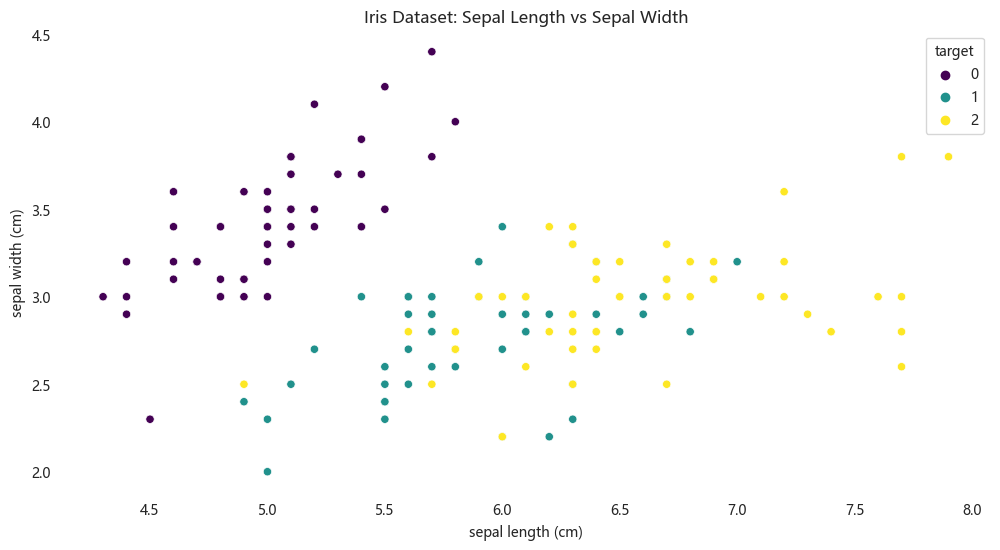

In [10]:
plot_iris(iris)

In [11]:
add_image_to_excel(
    position='right',
    gap=2,
    figsize=(8,4),
    dpi=100,
    image_path=OUTPUT_FIG_PATH,
    image_name='iris_plot.png',
    excel_path=OUTPUT_DATA_PATH,
    excel_name=OUTPUT_DATA_NAME,
    sheet_name='iris',
)


iris_plot.png added to excel module_test.xlsx, sheet iris


## 3.2: save Wine plot to excel

In [12]:
def plot_wine(df: pd.DataFrame,  save_path: Path = OUTPUT_FIG_PATH):
    plt.figure(figsize=(8,4))
    sns.barplot(x='target', y='alcohol', data=df, palette='viridis')
    plt.title('Wine Dataset: Average Alcohol Content by Class')
    plt.savefig(save_path/'wine_plot.png')

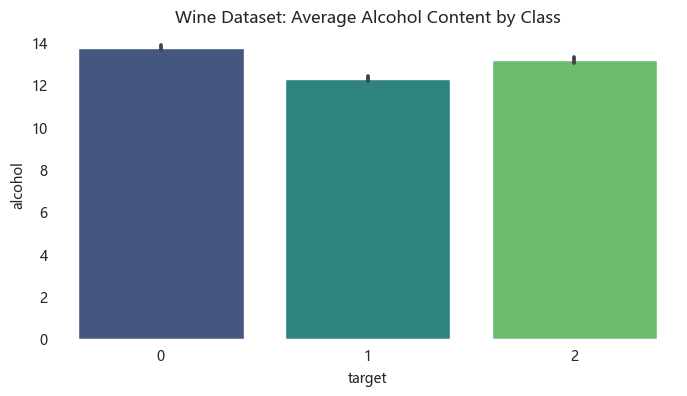

In [13]:
plot_wine(wine)

In [14]:
add_image_to_excel(
    position='bottom',
    gap=2,
    figsize=(8,4),
    dpi=100,
    image_path=OUTPUT_FIG_PATH,
    image_name='wine_plot.png',
    excel_path=OUTPUT_DATA_PATH,
    excel_name=OUTPUT_DATA_NAME,
    sheet_name='wine',
)


wine_plot.png added to excel module_test.xlsx, sheet wine


# 4. Save locked excel (save_locked_excel)

In [15]:
def create_output_df():
    df = pd.DataFrame({
        'col1': ['a', 'b', 'c'],
        'col2': ['d', 'e', 'f'],
        'col3': [0.001, 0.285, pd.NA],
        'link':['https://www.google.com', 'https://www.baidu.com', 'https://www.bing.com']})
    return df

In [16]:
output_df = create_output_df()
output_df

,col1,col2,col3,link
0,a,d,0.001,https://www.google.com
1,b,e,0.285,https://www.baidu.com
2,c,f,<NA>,https://www.bing.com


## 4.1 lock col1,2, coloring col2, validate col3 as decimal, hyperlink link

In [17]:
save_locked_excel(
    target_df=output_df,
    output_path=OUTPUT_DATA_PATH,
    output_name=OUTPUT_DATA_NAME,
    new_sheet_name='locked_sheet',
    excel_password='a_fake_password',
    lock_columns=['col1','col2'],
    coloring_columns={'col2':'#FFA384'},
    link_columns=['link'],
    validation_dict={'col3':'decimal'},
    validation_kwargs={
        'decimal':{"operator": "between",
                   "formula1": 0,
                   "formula2": 1,
                   "showErrorMessage": True,
                   "errorTitle": "Invalid input",
                   "error": "Value must be a decimal between 0 and 1."
                   }})

Created locked_sheet in C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data\module_test.xlsx
locked_sheet has been saved to module_test.xlsx at C:\Users\Qilun\Desktop\Lvzhi\projects\excel_functions\data

locked columns: ['col1', 'col2']
coloring columns: {'col2': '#FFA384'}
hyperlinked columns: ['link']
validated column: col3 to decimal
